### Codio Activity 13.5: Experimenting with $\beta_0$ and $\beta_1$ in Logistic Function

**Expected Time: 45 Minutes**

**Total Points: 40**

### This activity focuses on changing the $\beta_0$ and $\beta_1$ parameters within the logistic function.  Your goal should be to understand how each parameter effects the resulting sigmoid curve.  In the next activity, you will use a numeric approach to identify the best parameters to fit a given classification problem, here your goal is to see how these parameters change the geometry of the curve.

### Index

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

### The Data

### For this activity we revisit the credit data and examine only the balance feature to classifiy 

In [2]:
credit = pd.read_csv('data/default.csv')

In [3]:
credit.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [4]:
y = np.where(credit['default'] == 'Yes', 1, 0)

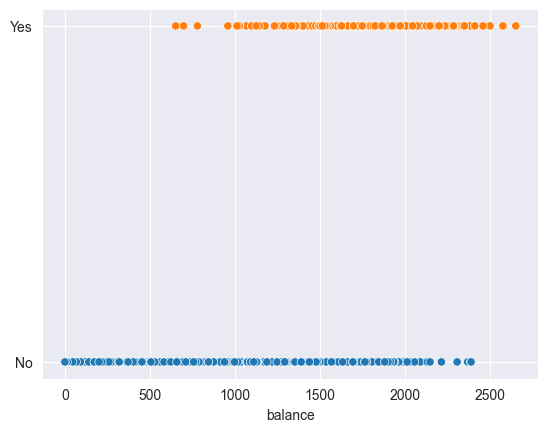

In [5]:
sns.scatterplot(data = credit, x = 'balance', y = y, hue = 'default', legend = False)
plt.yticks([0, 1], ['No', 'Yes']);

[Back to top](#-Index)

### Problem 1

### Function for Plotting 

**10 Points**

### Use the formula below to create a function that takes in a value for `x`, `beta_0`, and `beta_1`, and returns:

$$\text{sigmoid}(f, \beta_0, \beta_1) = \frac{1}{1 + e^{-(\beta_0 + \beta_1x})}$$



In [6]:
### GRADED

def sigmoid(x, beta_0, beta_1):
    """Implements sigmoid function with linear parameters
    beta_0 and beta_1.
    
    Parameters
    ----------
    x: type `np.ndarray`
       1D NumPy array of domain inputs
    beta_0: type `float`
        float representing y-intercept of linear exponent
    beta_1: type `float`
        float representing slope of linear exponent
        
    Returns array of values size len(x)
    """
    return None

# YOUR CODE HERE
def sigmoid(x, beta_0, beta_1):
    return 1/(1 + np.exp(-(beta_0 + beta_1*x)))

# Answer check
sigmoid(np.array([-1, 0, 1]), 1, 1)

array([0.5       , 0.73105858, 0.88079708])

[Back to top](#-Index)

### Problem 2

### Varying $\beta_0$

**10 Points**

### Below, the image shows three curves plotted, all with $\beta_1 = 0.01$, and with $\beta_0 = 5, 10, 15$.  Enter your answer as an integer with the appropriate $\beta_0$ value to the respective variables `a`, `b`, and `c` below.

1. $\beta_0 = 15$
2. $\beta_0 = 10$
3. $\beta_0 = 5$

<center>
    <img src = 'images/betasopt.png' />
</center>

In [7]:
### GRADED

#assign integer values for beta0 to appropriate variable 5, 10, or 15
a = ''
b = ''
c = ''

# YOUR CODE HERE
a = 5
b = 10
c = 15

# Answer check
print(type(a))

<class 'int'>


[Back to top](#-Index)

### Problem 3

### Varying $\beta_1$

**10 Points**

### Now, compare the given values for $\beta_1$ with $\beta_0 = 10$ and match the correct curve with the given value as a float below.

1. $\beta_1 = -0.025$
2. $\beta_1 = -0.01$
3. $\beta_1 = -0.005$


<center>
    <img src = 'images/p3.png' />
</center>

In [8]:
### GRADED

#assign float values for beta0 to appropriate variable -0.025, 0.01, or 0.005 below
a = ''
b = ''
c = ''

# YOUR CODE HERE
a = -0.01
b = -0.025
c = -0.005

# Answer check
print(type(a))

<class 'float'>


[Back to top](#-Index)

### Problem 4

### Comparing to `LogisticRegression` estimator

**10 Points**

### Finally, identify the values that the scikitlearn estimator `LogisticRegression` suggests for $\beta_0$ and $\beta_1$.  Assign these as floats to `beta_0` and `beta_1` below.  

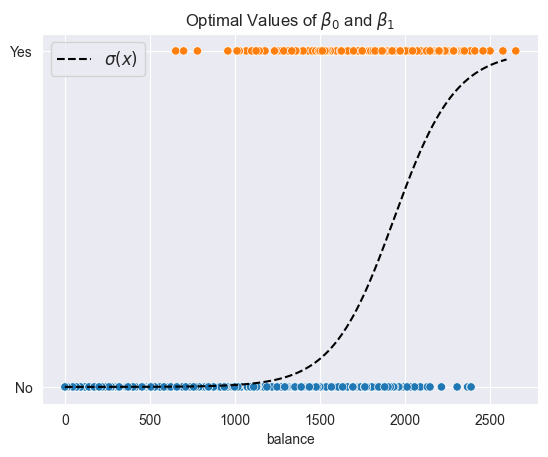

In [9]:
### GRADED

beta_0 = ''
beta_1 = ''

# YOUR CODE HERE
clf = LogisticRegression().fit(credit[['balance']], y)
beta_0 = float(clf.intercept_)
beta_1 = float(clf.coef_)
# print('x ', x)
x = np.linspace(0, 2600, 1000)
x_values = np.linspace(credit['balance'].min(), credit['balance'].max(), 100)
#print(credit['balance'].min(), credit['balance'].max())
#print('x ', x)
#print('x_values ', x_values)

# Answer check
sns.scatterplot(data = credit, x = 'balance', y = y, hue = 'default', legend = False)
plt.yticks([0, 1], ['No', 'Yes'])
plt.plot(x, sigmoid(x, beta_0, beta_1), '--', color = 'black', label = r'$\sigma(x)$')
plt.legend(fontsize = 12)
plt.title(r'Optimal Values of $\beta_0$ and $\beta_1$');

### Now that you have a feel for how these parameters control the shape of the sigmoid curve, we will introduce a loss function that we try to minimize in order to solve for the optimal values of $\beta_0$ and $\beta_1$.